## 분류 문제의 역전파

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
X = np.arange(-1.0, 1.1, 0.1)
Y = np.arange(-1.0, 1.1, 0.1)

# 입력데이터
input_data = []
# 정답 
correct_data = []
for x in X:
    for y in Y:
        input_data.append([x, y])
        if y < np.sin(np.pi * x): #y값이 sin 곡선 아래에 있으면
            correct_data.append([0,1])
        else:
            correct_data.append([1,0]) #??
            
n_data = len(correct_data)

input_data = np.array(input_data)
correct_data = np.array(correct_data)

n_in = 2 # 입력층
n_mid = 6 # 은닉층
n_out = 2 # 출력층

wb_width = 0.1
eta = 0.1
epoch = 101
interval = 10

class MiddleLayer:
    # 생성자
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n) # 가중치(행렬)
        self.b = wb_width * np.random.randn(n) # 편향(벡터)
    
    # 순전파
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1 / (1+np.exp(-u)) # Sigmoid 함수
        
    # 역전파
    def backward(self, grad_y):
        delta = grad_y * (1 - self.y) * self.y
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    # 수정
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b  

        
class OutLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n) # 가중치(행렬)
        self.b = wb_width * np.random.randn(n) # 편항(벡터)
    
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u) / np.sum(np.exp(u), axis=1, \
                                   keepdims=True) # 소프트맥스 함수
        # 배치사이즈 X 1 형태의 행렬을 유지하기 위해 keepdims=True 사용
    
    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
    
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

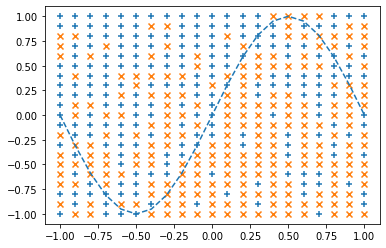

Epoch:0/101 Error:-0.6387745677970016


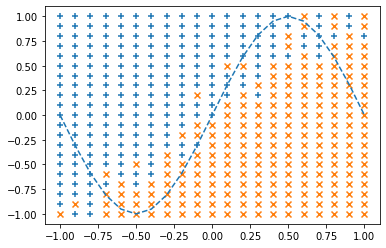

Epoch:10/101 Error:-0.37130489026006175


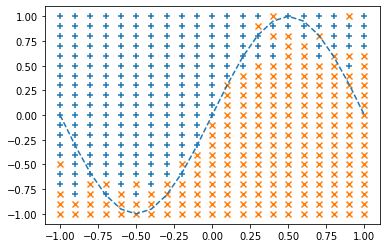

Epoch:20/101 Error:-0.25014558549183236


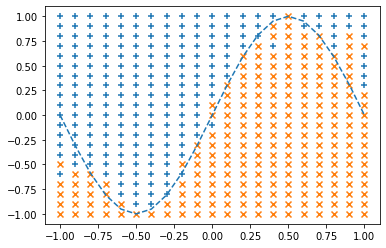

Epoch:30/101 Error:-0.18106049982869413


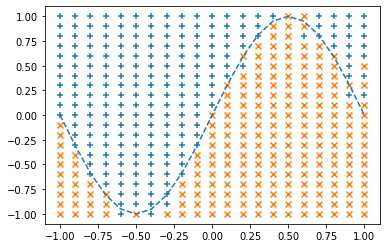

Epoch:40/101 Error:-0.12550284044690696


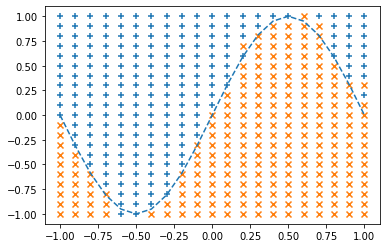

Epoch:50/101 Error:-0.09759953079073727


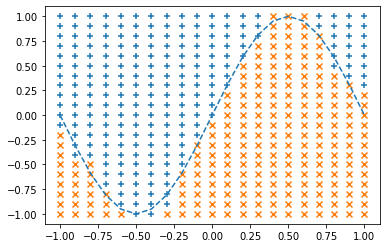

Epoch:60/101 Error:-0.08494157399692641


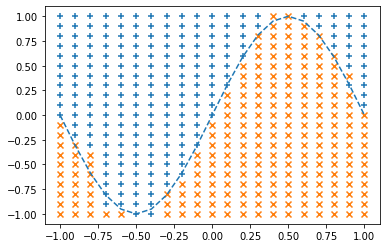

Epoch:70/101 Error:-0.07440960975729159


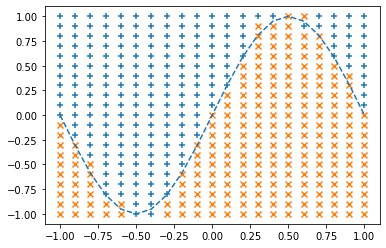

Epoch:80/101 Error:-0.07438451014122036


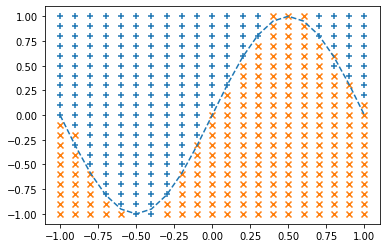

Epoch:90/101 Error:-0.07206579657444487


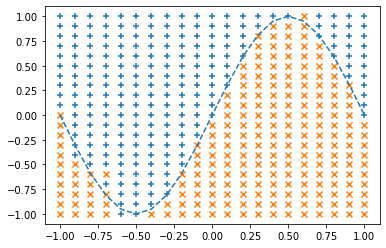

Epoch:100/101 Error:-0.059876968054610444


In [14]:
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutLayer(n_mid, n_out)
sin_data = np.sin(np.pi * X)
for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    total_error = 0
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []
    for idx in index_random:
        x = input_data[idx]
        t = correct_data[idx]
        middle_layer.forward(x.reshape(1,2))
        output_layer.forward(middle_layer.y)
        output_layer.backward(t.reshape(1,2))
        middle_layer.backward(output_layer.grad_x)
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval == 0:
            y = output_layer.y.reshape(-1)
            total_error += np.sum(t * np.log(y + 1e-7))
            if y[0] > y[1]:
                x_1.append(x[0])
                y_1.append(x[1])
            else:
                x_2.append(x[0])
                y_2.append(x[1])
                
    if i % interval == 0:
        plt.plot(X, sin_data, linestyle="dashed")
        plt.scatter(x_1, y_1, marker='+')
        plt.scatter(x_2, y_2, marker='x')
        plt.show()
        print("Epoch:"+str(i)+'/'+str(epoch), \
             "Error:"+str(total_error/n_data))